# Chem 30324, Spring 2020, Homework 10


# Due April 24, 2020

## Thermodynamics from scratch.
### Let’s calculate the thermodynamic properties of an ideal gas of CO molecules at 1 bar pressure. CO has a rotational constant B = 1.931 cm$^{-1}$ and vibrational frequency ν = 2156.6 cm$^{-1}$ . Suppose you have a 20 dm$^3$ cubic bottle containing 1 mole of CO gas that you can consider to behave ideally.

### 1. The characteristic temperature $\Theta$ of a particular degree of freedom is the characteristic quantum of energy for the degree of freedom divided by $k_B$ . Calculate the characteristic translational, rotational, and vibrational temperatures of CO.

$\theta_{trans} = \frac{\pi^2\hbar^2}{2mL^2k_B}$

$\theta_{rot} = hcB/k_B$

$\theta_{vib} = hc\tilde{\nu}/k_B$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

hbar = 1.05457e-34 # J*s
h = 6.62607e-34 # J*s
kB = 1.38065e-23 # J/K
m = 28.01*1.6605e-27 # kg/molecule
V = 0.02 # m^3
c = 2.99792e10 # cm/s
B = 1.931 # cm^-1
v = 2156.6 # cm^-1
T_trans = np.pi**2*hbar**2/2/m/V**(2/3)/kB
T_rot = h*c*B/kB
T_vib = h*c*v/kB
print('Characteristic temperatures of CO:')
print('T_trans = {0:.3e} K, T_rot = {1:.3f} K, T_vib = {2:0.2f} K.'.format(T_trans,T_rot,T_vib))

Characteristic temperatures of CO:
T_trans = 1.160e-18 K, T_rot = 2.778 K, T_vib = 3102.86 K.


### 2. Calculate the *translational partition function* of a CO molecule in the bottle at 298 K. What is the unit of the partition function?

For $T \gg \theta_{trans}$, $\Lambda \ll L$, $q_{trans} = V/\Lambda^3$. $\Lambda = h \left(\frac{\beta}{2\pi m}\right)^{1/2}$.

In [2]:
Lamda = h*(1/(kB*298*2*np.pi*m))**0.5
print(Lamda)
q_trans = V/Lamda**3
print('The translational partition function of a CO molecule in the bottle at 298 K is {:.4E}.'.format(q_trans))
print('It is dimensionless.')

1.9109096798652453e-11
The translational partition function of a CO molecule in the bottle at 298 K is 2.8662E+30.
It is dimensionless.


### 3. Plot the *rotational and vibrational partition functions* of a CO molecule in the bottle from $T$ =  200  to 2000 K (assume the CO remains a gas over the whole range). *Hint:* Use your answer to Problem 1 to simplify calculating the rotational partition function.


$q_{rot} = \frac{1}{\sigma}\frac{T}{\theta_{rot}} = \frac{T}{\theta_{rot}}$

 $q_{vib} = \frac{1}{1-e^{-\theta_{vib}/T}}$

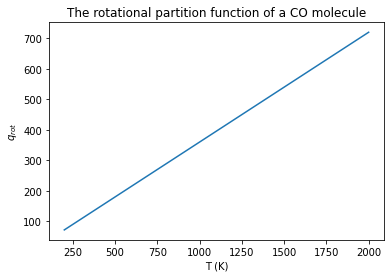

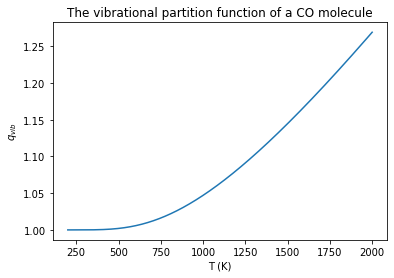

In [3]:
T = np.linspace(200,2000,1000) # r = R/a_0
q_rot = T/T_rot
q_vib = 1/(1-np.exp(-T_vib/T))
plt.plot(T,q_rot)
plt.xlabel('T (K)')
plt.ylabel('$q_{rot}$')
plt.title('The rotational partition function of a CO molecule')
plt.show()
plt.plot(T,q_vib)
plt.xlabel('T (K)')
plt.ylabel('$q_{vib}$')
plt.title('The vibrational partition function of a CO molecule')
plt.show()

### 4. Plot the *total translational, rotational, and vibrational energies* of CO in the bottle from $T =$ 200 to 2000 K (assume the CO remains a gas over the whole range). Which (if any) of the three types of motions dominate the total energy?

$U_{trans} = \frac{3}{2}RT$

 $U_{rot} = RT$
 
  $U_{vib} = R\frac{\theta_{vib}}{e^{\theta_{vib}/T}-1}$.

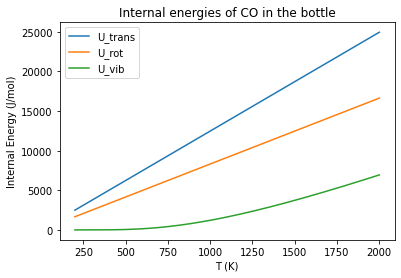

In [4]:
R = 8.31447 # J/(mol*K)
U_trans = 1.5*R*T
U_rot = R*T
U_vib = R*T_vib/(np.exp(T_vib/T)-1)
plt.plot(T,U_trans,label='U_trans')
plt.plot(T,U_rot,label='U_rot')
plt.plot(T,U_vib,label='U_vib')
plt.legend()
plt.xlabel('T (K)')
plt.ylabel('Internal Energy (J/mol)')
plt.title('Internal energies of CO in the bottle')
plt.show()

### 5. Plot the *total translational, rotational, and vibrational constant volume molar heat capacities* of CO in the bottle from $T =$ 200 to 2000 K. Which (if any) of the three types of motions dominate the heat capacity?

$C_{V,trans} = \frac{3}{2}R$

 $C_{V,rot} = R$
 
  $C_{V,vib} = R\left(\frac{\theta_{vib}}{T}\frac{e^{\theta_{vib}/2T}}{e^{\theta_{vib}/T}-1}\right)^2$

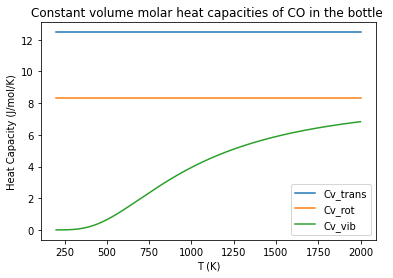

While translational motion contributes the most to the molar heat capacity of CO,
it does not dominate over rotational and vibrational motion.


In [5]:
Cv_trans = np.linspace(1.5*R,1.5*R,1000)
Cv_rot = np.linspace(R,R,1000)
Cv_vib = R*(T_vib/T*np.exp(T_vib/2./T)/(np.exp(T_vib/T)-1))**2
plt.plot(T,Cv_trans,label='Cv_trans')
plt.plot(T,Cv_rot,label='Cv_rot')
plt.plot(T,Cv_vib,label='Cv_vib')
plt.legend()
plt.xlabel('T (K)')
plt.ylabel('Heat Capacity (J/mol/K)')
plt.title('Constant volume molar heat capacities of CO in the bottle ')
plt.show()
print('While translational motion contributes the most to the molar heat capacity of CO,')
print('it does not dominate over rotational and vibrational motion.')

### 6. Plot the *total translational, rotational, and vibrational Helmholtz energies* of CO in the bottle from $T =$ 200 to 2000 K. Which (if any) of the three types of motions dominate the Helmholtz energy?


$A = U - TS$

$S_{trans} = Rln\left(\frac{e^{5/2}V}{N\Lambda^3}\right)$

$S_{rot} = R(1-ln(\theta_{rot}/T))$

$S_{vib} = R\left(\frac{\theta_{vib}/T}{e^{\theta_{vib}/T}-1}-ln(1-e^{-\theta_{vib}/T})\right)$.

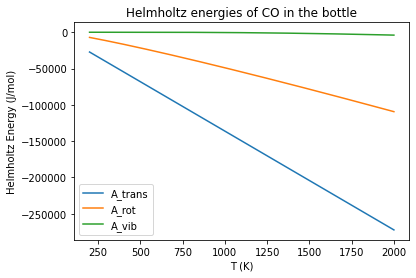

In [6]:
NA = 6.022e23
S_trans = R*np.log(np.exp(2.5)*V/NA/Lamda**3)
S_rot = R*(1-np.log(T_rot/T))
S_vib = R*(T_vib/T/(np.exp(T_vib/T)-1)-np.log(1-np.exp(-T_vib/T)))
A_trans = U_trans-T*S_trans
A_rot = U_rot-T*S_rot
A_vib = U_vib-T*S_vib
plt.plot(T,A_trans,label='A_trans')
plt.plot(T,A_rot,label='A_rot')
plt.plot(T,A_vib,label='A_vib')
plt.legend()
plt.xlabel('T (K)')
plt.ylabel('Helmholtz Energy (J/mol)')
plt.title('Helmholtz energies of CO in the bottle')
plt.show()

### 7. Use your formulas to calculate $\Delta P$, $\Delta U$, $\Delta A$, and $\Delta S$ associated with isothermally expanding the gas from 20 dm$^3$ to 40 dm$^3$.

T = 298 K. $\Delta U=0$. 

$\Delta P = \frac{RT}{V_2} - \frac{RT}{V_1}$. 

$\Delta S = S_{trans,2} - S_{trans,1}$. 

$A = U-TS$, so, $\Delta A = -T\Delta S$.

In [7]:
V2 = 0.04 # m^3
deltaP = R*298*(1/V2-1/V)
deltaS = R*np.log(np.exp(2.5)*V2/NA/Lamda**3) - R*np.log(np.exp(2.5)*V/NA/Lamda**3)
deltaA = -deltaS*298
print('Delta P = {0:.3f} Pa, Delta U = 0, Delta A = {1:.3f} J/mol, and Delta S = {2:.3f} J/mol/K.'.format(deltaP,deltaA,deltaS))

Delta P = -61942.801 Pa, Delta U = 0, Delta A = -1717.419 J/mol, and Delta S = 5.763 J/mol/K.


## Reactions from scratch
### In 1996, Schneider and co-workers used quantum chemistry to compute the reaction pathway for unimolecular decomposition of trifluoromethanol, a reaction of relevance to the atmospheric degradation of hydrofluorocarbon refrigerants (*J. Phys. Chem.* **1996**, *100*, 6097- 6103, [doi:10.1021/jp952703m](https://pubs.acs.org/doi/abs/10.1021/jp952703m)): $$\mathrm{CF_3OH\rightarrow COF_2 + HF}$$
### Following are some of the reported results, computed at 298 K:

|              | CF$_3$OH| C(O)F$_2$ | HF |    |
|:--------------|---------:|-----------:|----:|----:| 
| $E^\text{elec}$ | -412.90047 | -312.57028 | -100.31885 | (Hartree) |
| ZPE             | 0.02889 | 0.01422 | 0.00925 | (Hartree) |
| $U^\text{trans}$ | 3.7 | 3.7| 3.7 | (kJ mol$^{-1}$) |
| $U^\text{rot }$ | 3.7 | 3.7| 2.5 | (kJ mol$^{-1}$) |
| $U^\text{vib}$ | 4.3 | 1.2 | 0 |  (kJ mol$^{-1}$) |
| $q^{\text{trans}}/V$ | $7.72\times 10^{32}$ | $1.59\times 10^{32}$ |$8.65\times 10^{31}$ | (m$^{-3}$) |
| $q^\text{rot}$ | 61830 | 679 | 9.59 | |
| $q^\text{vib}$ | 2.33 | 1.16 | 1 | |

### 8. Using the data provided, determine $\Delta U^{\circ}$(298 K)), in kJ mol$^{-1}$, assuming ideal behavior and 1 M standard state.  Recall that $U(T)$ is the sum of the contributions of all degrees of freedom.  

Remember that $E_0$ is contained in $\Delta{U}^{\circ},\Delta{A}^{\circ},$ and $\Delta{G}^{\circ}.$ For example:

$$\Delta U^{\circ} =\sum_{product}U_{trans} + U_{rot} + U_{vib} + (E_{elec} + ZPE) - \sum_{reactant} U_{trans} + U_{rot} + U_{vib} + (E_{elec} + ZPE)$$$$=\sum_{product}U_{trans} + U_{rot} + U_{vib} + E_0 - \sum_{reactant} U_{trans} + U_{rot} + U_{vib} + E_0$$
$\Delta U^{\circ} =\Delta(U_{trans} + U_{rot} + U_{vib}) + \Delta(E_0)$

In [8]:
import numpy as np
T = 298 # K
k = 1.38065e-23 # J/K
R = 8.31447 # J/(mol*K)
Na = 6.0221e23  # 1/mol
c = 6.0221e26  # 1/m^3, conversion factor of 1mol/L = 6.02e26 particles/m^3
autokJ = 2625.50

Eelec = [-412.90047 ,-312.57028 ,-100.31885 ] # kJ/mol
ZPE = [0.02889 ,0.01422 ,0.00925 ] # kJ/mol
dE0 = ((Eelec[1] + ZPE[1] + Eelec[2] + ZPE[2]) - (Eelec[0] + ZPE[0]))* autokJ # kJ/mol
u_trans = [3.7,3.7,3.7] #kJ/mol
u_rot = [3.7,3.7,2.5] #kJ/mol
u_vib = [4.3,1.2,0] #kJ/mol
dU = dE0 + (u_trans[1]+u_rot[1]+u_vib[1])+(u_trans[2]+u_rot[2]+u_vib[2])-(u_trans[0]+u_rot[0]+u_vib[0])#kJ/mol
print("delta_U = %.2f kJ/mol"%dU)

delta_U = 18.64 kJ/mol


### 9. Using the data provided, determine  $\Delta A^{\circ}$(298 K) in kJ mol$^{-1}$, assuming ideal behavior and 1 M standard state.  Recall that $A^\circ=E^\text{elec} + \text{ZPE}-RT\ln(q^\circ)-RT$ and that $q^\circ =(q^\text{trans}/V)q^\text{rot}q^\text{vib}/c^\circ$ in units corresponding with the standard state.

$\Delta{A^{\circ}}= \big\{[-k_BT\ln(q_{t}q_{r}q_{v})-k_BT]_{COF_2}+[-k_BT\ln(q_{t}q_{r}q_{v})-k_BT]_{HF}-[-k_BT\ln(q_{t}q_{r}q_{v})-k_BT]_{CF_3OH}\big\} *N_A + \Delta(E_0)$
$\quad \quad = \Delta(E_0)-RT\ln(Q)-RT$

In [9]:
q_trans = [7.72e32/c,1.59e32/c,8.65e31/c] # change translational partition functions from 1/m3 to mol/l std state
q_rot = [61830,679,9.59] # unitless
q_vib = [2.33,1.16,1] # unitless    
Q = (q_trans[1]*q_rot[1]*q_vib[1])*(q_trans[2]*q_rot[2]*q_vib[2])/(q_trans[0]*q_rot[0]*q_vib[0]) # total partition 
dA = dE0 + (-R*T*np.log(Q)- R*T)/1000 #kJ/mol
print("Q = %.2f"%Q)
print("delta_E0 = %.2f"%dE0)
print("delta_A = %.2f kJ/mol"%dA)

Q = 1551.10
delta_E0 = 15.54
delta_A = -5.14 kJ/mol


### 10. Determine $\Delta G^\circ$(298 K).  Recall that $G = A + PV = A + RT$ for an ideal ga.


$\Delta{G^{\circ}} = \Delta{A^{\circ}} + \Delta(PV)$
$\quad = \quad \Delta{A^{\circ}} + RT$

In [10]:
dG = dA + R*T/1000 #kJ/mol
print("delta_G = %.2f kJ/mol"%dG)

delta_G = -2.66 kJ/mol


### 11. Determine $\Delta S^{\circ}$(298 K), in J mol$^{-1}$ K$^{-1}$ , assuming a 1 M standard state. Recall that $S = (U - A)/T$.


$\Delta A^{\circ} = \Delta U^{\circ} - T\Delta S^{\circ}$

$\Delta S^{\circ} = \frac{\Delta U^{\circ} - \Delta A^{\circ}}{T}$

In [11]:
dS = 1000*(dU - dA)/T
print("delta_S = %.2f J/mol K"%dS)

delta_S = 79.80 J/mol K


### 12. Using the data provided, determine $K_c$ (298 K), assuming a 1 M standard state.  You may either determine from partition functions of from the relationship between $K_c$ and $\Delta G^\circ$.

$\mathrm{A} \rightarrow \mathrm{B + C}$$$K_c(T) = \frac{\frac{q_{\mathrm{B}}}{V}\frac{q_{\mathrm{C}}}{V}}{\frac{q_{\mathrm{A}}}{V}} \frac{1}{c^{\circ}} e^{-\Delta{E(0)}/kT} = e^{-\Delta G^\circ(T)/RT}, \quad \text{where} \quad \frac{q_i}{V} = \frac{q_{trans}}{V}q_{rot}q_{vib}$$
Note: $K_c(T)$ is formally unitless but "remembers" that it refers to 1 M standard state.



In [12]:
Kc = Q *np.exp(-dE0*1000/(R*T)) # Kc equation from lecture notes
print('Kc = %.3f (unitless). '%(Kc))

Kc = 2.926 (unitless). 


In [13]:
Kc = np.exp(-dG*1000/(R*T))
print('Kc = %.3f (unitless). '%(Kc))

Kc = 2.926 (unitless). 


### 13. 1 mole of CF$_3$OH is generated in a 20 L vessel at 298 K and left long enough to come to equilibrium with respect to its decomposition reaction. What is the composition of the gas (concentrations of all the components) at equilibrium (in mol/L)?

1 mol/ 20 L = 0.05 mol/L

$\mathrm{A} \rightarrow \mathrm{B + C}$

$K_c = \frac{x^2}{0.05-x}$, solve for x. Note that x = $[\frac{mol}{L}]$.

In [22]:
from sympy import * 
x = symbols('x',positive=True)
c = solve(x**2-(0.05-x)*Kc,x)
print('At equilibrium, CF3OH = %.2E mol/L, COF2 = %.5f mol/L, HF = %.5f mol/L.'%(0.05-c[0],c[0],c[0]))
print('At equilibrium, CF3OH = %.2E mol, COF2 = %.5f mol, HF = %.5f mol.'%((0.05-c[0])*20,c[0]*20,c[0]*20))

At equilibrium, CF3OH = 8.26E-04 mol/L, COF2 = 0.04917 mol/L, HF = 0.04917 mol/L.
At equilibrium, CF3OH = 1.65E-02 mol, COF2 = 0.98347 mol, HF = 0.98347 mol.


### 14. How, directionally, would your answer to Question 13 change if the vessel was at a higher temperature? Use the van'T Hoff relationship to determine the equilibrium constant and equilibrium concentrations at 273 and 323 K. How good was your guess?

From question #8, we know that at 298K,  $\Delta U$ = 18.64 kJ/mol. 

$\Delta H = \Delta U + \Delta (nRT) = \Delta U + RT\Delta n$

In [15]:
dn = 2-1
R = 8.314/1000 #kJ/mol K
T = 298 #K
dH = dU+dn*R*T #kJ/mol
print("dH =",round(dH,3),"kJ/mol")

dH = 21.121 kJ/mol


Since $\Delta H$ is positive, we expect $K \uparrow$ as $T \uparrow$

The Van't Hoff equation states:

$ln\frac{K(T_2)}{K(T_1)}=\frac{-\Delta H^o}{R}(\frac{1}{T_2}-\frac{1}{T_1})$

We know from question 12, K = 2.926 at 298 K.

In [16]:
K1 = 2.926
T1 = 298 #K
T2 = 273 #K
K2 = K1*np.exp(-dH/R*(1/T2-1/T1))
print('K=', round(K2,4), 'at 273 K.')
x = symbols('x',positive=True)
c = solve(x**2-(0.05-x)*K2,x)
print('At equilibrium, CF3OH = %.2E mol/L, COF2 = %.5f mol/L, HF = %.5f mol/L.'%(0.05-c[0],c[0],c[0]))

K= 1.3404 at 273 K.
At equilibrium, CF3OH = 1.74E-03 mol/L, COF2 = 0.04826 mol/L, HF = 0.04826 mol/L.


In [17]:
K1 = 2.926
T1 = 298 #K
T2 = 323 #K
K2 = K1*np.exp(-dH/R*(1/T2-1/T1))
print('K=', round(K2,4), 'at 323 K.')
x = symbols('x',positive=True)
c = solve(x**2-(0.05-x)*K2,x)
print('At equilibrium, CF3OH = %.2E mol/L, COF2 = %.5f mol/L, HF = %.5f mol/L.'%(0.05-c[0],c[0],c[0]))

K= 5.6601 at 323 K.
At equilibrium, CF3OH = 4.34E-04 mol/L, COF2 = 0.04957 mol/L, HF = 0.04957 mol/L.


Therefore, the at higher temperatures, the reaction shifts towards the products.

### 15. How, directionally, would your answer to Question 13 change if the vessel had a volume of 5 L? Redo the calculation at this volume to verify your guess.

If V = 5L, the initial concentration = $\frac{1 mol}{5 L}=.2 M$

$K_c = \frac{x^2}{0.2-x}$

At 298 K, Kc = 2.926 (from problem 12)

In [24]:
T = 298 #K
R = 8.314
Kc = np.exp(-dG*1000/(R*T))
print('At 298 K, Kc = %.3f (unitless). '%(Kc))
x = symbols('x',positive=True)
c = solve(x**2-(0.2-x)*Kc,x)
print('At equilibrium, CF3OH = %.2E mol/L, COF2 = %.5f mol/L, HF = %.5f mol/L.'%(0.2-c[0],c[0],c[0]))
print('At equilibrium, CF3OH = %.2E mol, COF2 = %.5f mol, HF = %.5f mol.'%((0.2-c[0])*5,c[0]*5,c[0]*5))
print('At a smaller volume, the concentration of products increases, but the number of moles decreases.')

At 298 K, Kc = 2.926 (unitless). 
At equilibrium, CF3OH = 1.21E-02 mol/L, COF2 = 0.18793 mol/L, HF = 0.18793 mol/L.
At equilibrium, CF3OH = 6.03E-02 mol, COF2 = 0.93965 mol, HF = 0.93965 mol.
At a smaller volume, the concentration of products increases, but the number of moles decreases.


### 16. Consult a thermodynamics source (e.g. https://webbook.nist.gov/chemistry/) to determine $\Delta H^\circ$(298 K), $\Delta S^\circ$(298 K), and $\Delta G^\circ$(298 K) for the homologous reaction CH$_3$OH (g)$\rightarrow$ H$_2$O (g) + H$_2$CO (g).  Does the substitution of F by H make the reaction more or less favorable?

In [27]:
T = 298 #K
#All values were taken from NIST

#Methanol
Hm = -205 #kJ/mol
Sm = .2399 #kJ/mol K
Gm = Hm - T*Sm #kJ/mol

#Hydrogen
Hh = 0
Sh = .13068 #J/mol K
Gh = Hh - T*Sh #kJ/mol

#Formaldehyde
Hf = -108.6 #kJ/mol
Sf = .21895 #kJ/mol K
Gf = Hf - T*Sf #kJ/mol


delta_H = Hf+Hh-Hm #kJ/mol
delta_S = Sf+Sh-Sm #kJ/mol K
delta_G = Gf+Gh-Gm #kJ/mol

print('Delta H =',delta_H,'kJ/mol.')
print('Delta S =',delta_S,'kJ/mol K.')
print('Delta G =',delta_G,'kJ/mol.')

print('Therefore, by substituting F with H makes the reaction less favorable.')


Delta H = 96.4 kJ/mol.
Delta S = 0.10973 kJ/mol K.
Delta G = 63.70046000000002 kJ/mol.
Therefore, by substituting F with H makes the reaction less favorable.
